In [34]:
import tensorflow as tf
from autoencoders.vanilla_autoencoders import AUTOENCODER_300_150_300
from autoencoders.vanilla_autoencoders import AUTOENCODER_150
from autoencoders.vanilla_autoencoders import AUTOENCODER_50

from autoencoders.vanilla_autoencoders import tied_AUTOENCODER_300_150_300


from home.pn.PycharmProjects.autoencoders.helper_functions import *

In [2]:
train_data, test_data, m = get_mnist_data()

Getting MNIST data..
Retrieved MNIST data


Number of Epochs = 10
Train Loss:  1284.2373
Test Loss:  1289.2029


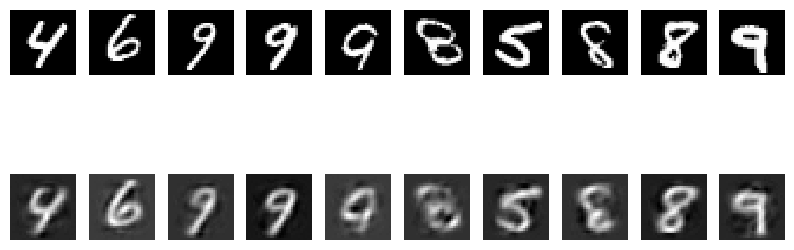

In [31]:
model = AUTOENCODER_300_150_300(l2_reg = 0.0)

init = tf.global_variables_initializer()

num_epochs = 10

#Train
train_loss, test_loss = [], []
batch_size = 200
with tf.Session()   as sess:
    init.run()
    train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
    test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
    print("Number of Epochs = " + str(num_epochs))
    for epoch in range(num_epochs):
        print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
        n_batches = m//batch_size
        for batch in range(n_batches):
            X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
            sess.run(model.training_op, feed_dict={model.X: X_batch})
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

    reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

print("Train Loss: ", train_loss[-1])
print("Test Loss: ", test_loss[-1])
plot_reconstructions(test_data[0: 10], reconstructions)

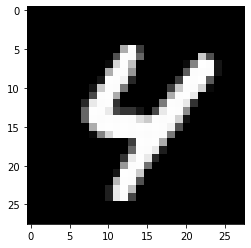

In [30]:
plt.imshow(weights1_val.reshape(28, 28))

Number of Epochs = 10
Train Loss:  1297.2964
Test Loss:  1300.636


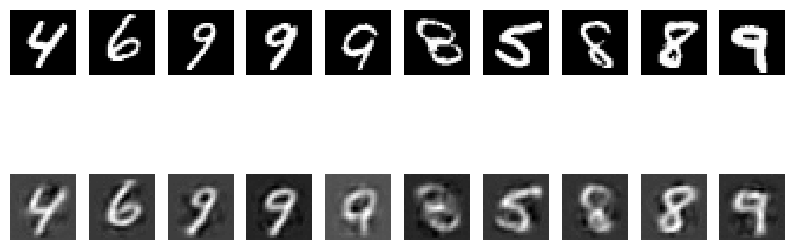

In [59]:
model = tied_AUTOENCODER_300_150_300(l2_reg = 0.0001)

init = tf.global_variables_initializer()

num_epochs = 10

#Train
train_loss, test_loss = [], []
batch_size = 200
with tf.Session()   as sess:
    init.run()
    train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
    test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
    print("Number of Epochs = " + str(num_epochs))
    for epoch in range(num_epochs):
        print(str(epoch) + "/" + str(num_epochs), end="\r")
        n_batches = m//batch_size
        for batch in range(n_batches):
            X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
            sess.run(model.training_op, feed_dict={model.X: X_batch})
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})
    weights1_val = model.weights1.eval()
    encoded = model.hidden2.eval(feed_dict={model.X: test_data})

plot_reconstructions(test_data[0: 10], reconstructions)

In [61]:
weights1_val[:, 0:10].T.shape

(10, 784)

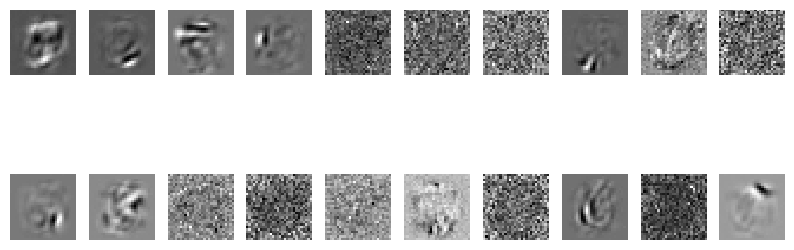

In [62]:
plot_reconstructions(weights1_val[:, 0:10].T, weights1_val[:, 10:21].T)

In [60]:
encoded.shape

(14000, 150)

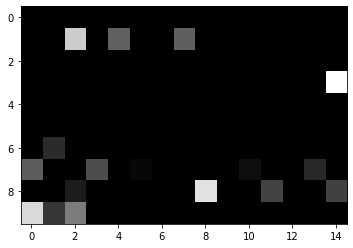

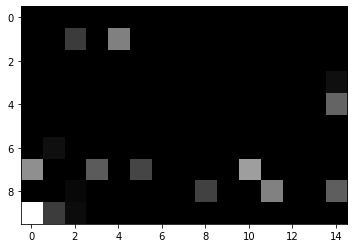

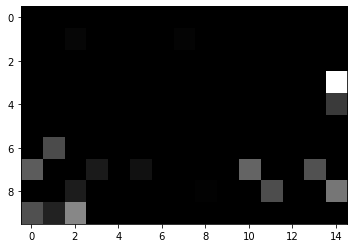

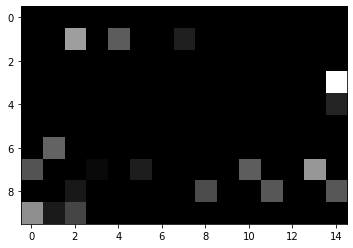

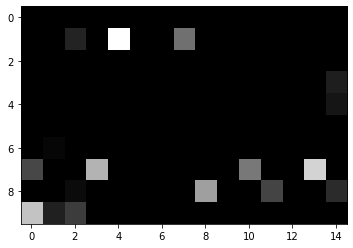

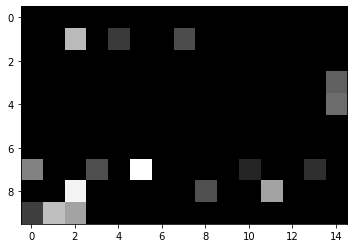

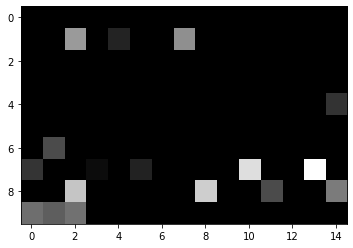

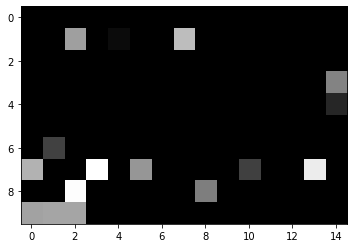

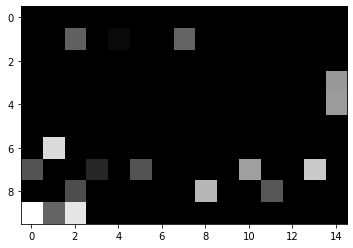

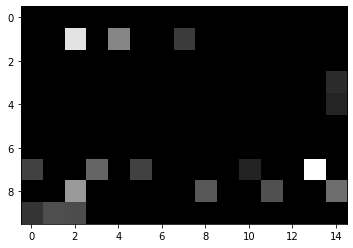

In [69]:
for i in range(0, 10):
    plt.imshow(encoded[i].reshape(10, 15))
    plt.show()